# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 10 - Mini-Projeto - Agrupando Clientes Por Consumo de Energia</font>

<br><br>

---

<br>

# 📄 Descrição Geral
O objetivo deste projeto é agrupar **consumidores de energia** com base no seu comportamento de consumo. Através da aplicação de técnicas de **clusterização**, como o **K-Means**, buscamos identificar padrões de consumo entre os clientes e entender suas características. Essa segmentação pode fornecer **insights valiosos** para a gestão de energia, campanhas de marketing direcionadas, e estratégias de otimização do consumo de eletricidade.

Ao longo do projeto, será necessário realizar o **tratamento de dados**, a **seleção de amostras representativas**, a **definição do número de clusters ideal**, e a **avaliação do desempenho** do modelo, bem como a **análise do consumo médio de energia** por grupo.

---

# 🎯 Objetivo
Realizar o agrupamento de **clientes** com base no **consumo de energia** utilizando a técnica de clusterização **K-Means**. As tarefas incluem:

1. **Tratamento dos dados** para lidar com **valores ausentes**.
2. **Amostragem** de 1% dos dados para construir o modelo de clusterização.
3. **Determinação** do número ideal de **clusters** para a segmentação dos clientes.
4. Criação do modelo **K-Means** com o número de clusters encontrado.
5. **Visualização dos clusters** através de um **Meshgrid**.
6. Exibição dos **centróides dos clusters**.
7. Cálculo do **Silhouette Score**, para avaliar a qualidade da clusterização.
8. Cálculo da **média de consumo de energia por cluster**, utilizando a coluna **Global_active_power**.

---

# 📊 Descrição do Dataset
O **dataset** utilizado para este projeto é composto por dados de **consumo de energia** de uma residência. Ele contém várias variáveis relacionadas ao consumo de eletricidade, coletadas em intervalos de tempo. As principais colunas do dataset incluem:

- **Date**: Data de registro do consumo.
- **Time**: Hora do registro do consumo.
- **Global_active_power**: Consumo total de energia ativa (em quilowatts).
- **Global_reactive_power**: Consumo de potência reativa (em quilowatts).
- **Voltage**: Tensão (em volts).
- **Global_intensity**: Intensidade global do consumo de energia (em amperes).
- **Sub_metering_1, Sub_metering_2, Sub_metering_3**: Medições de consumo de energia em submedidores (geralmente referentes a diferentes áreas ou dispositivos dentro da residência).

Esses dados foram registrados de maneira granular, com registros a cada minuto, e abrangem uma ampla gama de comportamentos de consumo ao longo do tempo.

---

# 🔄 Fluxograma do Processo

## 1. Carregar os Dados
**Descrição**: A primeira etapa consiste em **carregar o dataset** a partir do arquivo fornecido. Para isso, utilizamos a função `pd.read_csv` do **Pandas**, que irá importar os dados e prepará-los para o processamento. Este é o primeiro passo crucial para garantir que os dados estejam prontos para serem analisados e modelados.

---

## 2. Tratar os Valores Ausentes
**Descrição**: Após carregar os dados, o próximo passo é **identificar e tratar valores ausentes** (NaN) nas colunas do dataset. Essa etapa é essencial para garantir que o modelo de **clusterização** seja treinado com dados completos e confiáveis. Podemos utilizar técnicas como o **preenchimento com a média**, **mediana** ou até a **exclusão de linhas** para tratar esses valores ausentes de forma eficaz.

---

## 3. Coletar uma Amostra de 1% dos Dados
**Descrição**: Para otimizar o tempo de treinamento e evitar sobrecarga computacional, vamos **coletar uma amostra representativa de 1%** dos dados. Isso permite que criemos o modelo de **K-Means** de forma eficiente sem sacrificar a qualidade da análise. A amostra será utilizada para gerar insights sobre os dados de consumo de energia sem a necessidade de processar todo o conjunto de dados.

---

## 4. Encontrar o Melhor Valor de K
**Descrição**: O próximo passo é **determinar o número ideal de clusters** (K) para o modelo **K-Means**. Usaremos técnicas como o **Método do Cotovelo (Elbow)** ou a avaliação da **Curva de Silhueta** para encontrar o K que melhor divide os dados em clusters bem definidos. O objetivo é escolher o valor de K que representa a melhor segmentação dos clientes de acordo com seu comportamento de consumo.

---

## 5. Criar o Modelo K-Means
**Descrição**: Após encontrar o número ideal de clusters, **criaremos o modelo K-Means** com o valor de K obtido na etapa anterior. O modelo será treinado com a amostra de 1% dos dados coletados na etapa 3, e então será capaz de identificar padrões e segmentar os consumidores de energia de forma eficiente.

---

## 6. Criar um Meshgrid para Visualização dos Clusters
**Descrição**: Para **facilitar a visualização dos resultados da clusterização**, vamos criar um **Meshgrid**. Esse Meshgrid será uma grade de pontos no plano 2D onde cada ponto será classificado em um dos clusters. Isso permitirá visualizar como os clusters estão distribuídos ao longo das variáveis selecionadas, facilitando a interpretação dos dados.

---

## 7. Visualizar os Centrôides
**Descrição**: Os **centróides** de cada cluster serão **exibidos em um gráfico**. Esses centróides representam as características médias de cada grupo de clientes, e ao visualizá-los, podemos entender melhor as características centrais de cada segmento. A exibição dos centróides nos ajuda a compreender o comportamento de consumo típico de cada grupo de clientes.

---

## 8. Calcular o Silhouette Score
**Descrição**: O **Silhouette Score** será calculado para avaliar a qualidade da clusterização. Esta métrica nos informa o quão bem cada ponto de dados está posicionado dentro de seu cluster. Um valor próximo a **1** indica clusters bem definidos, enquanto valores próximos a **-1** indicam que os pontos podem ter sido agrupados de forma inadequada.

---

## 9. Calcular a Média de Consumo de Energia por Cluster
**Descrição**: Para cada cluster, calcularemos a **média de consumo de energia** utilizando a coluna **Global_active_power**. Isso nos ajudará a entender o **comportamento médio de consumo** de energia em cada segmento de clientes, permitindo insights sobre os padrões de consumo em diferentes grupos.


<br><br><br>

---

<br><br>

# Importando Pacotes

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<br><br>

---

<br>

# 1. Carregar os Dados

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [2]:
# Carregando os dados
dataset = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Info
dataset.info()

# Describe
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


<br><br>

---

<br>

# 2. Tratar os Valores Ausentes

In [4]:
# Verificando número de valores ausentes
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
# Excluindo todas as linhas com valores nulos
dataset_cleaned = dataset.dropna()

# Verificando se ainda existem valores nulos
print(dataset_cleaned.isnull().sum())

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


### 🔍 Objetivo:

- Excluir todas as linhas do dataset que possuem **valores nulos**, especialmente na coluna **Sub_metering_3**, que apresenta valores ausentes.

<br><br>

---

<br>

# 3. Coletar uma Amostra de 1% dos Dados

**Descrição**: Para otimizar o tempo de treinamento e evitar sobrecarga computacional, vamos **coletar uma amostra representativa de 1%** dos dados. Isso permite que criemos o modelo de **K-Means** de forma eficiente sem sacrificar a qualidade da análise. A amostra será utilizada para gerar insights sobre os dados de consumo de energia sem a necessidade de processar todo o conjunto de dados.

In [6]:
# Coletando uma amostra de 1% dos dados
sampled_data = dataset_cleaned.sample(frac=0.01, random_state=42)

# Verificando a amostra
display(sampled_data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1030580,1/12/2008,09:44:00,1.502,0.074,240.170,6.400,0.000,0.000,18.0
1815,17/12/2006,23:39:00,0.374,0.264,245.500,1.800,0.000,2.000,0.0
1295977,3/6/2009,17:01:00,0.620,0.300,239.850,3.000,0.000,1.000,1.0
206669,9/5/2007,05:53:00,0.280,0.200,235.720,1.400,0.000,0.000,0.0
1048893,14/12/2008,02:57:00,1.372,0.054,243.950,5.600,0.000,0.000,18.0


<br><br>

---

<br>

# 4. Encontrar o Melhor Valor de K

**Descrição**: O próximo passo é **determinar o número ideal de clusters** (K) para o modelo **K-Means**. Usaremos técnicas como o **Método do Cotovelo (Elbow)** ou a avaliação da **Curva de Silhueta** para encontrar o K que melhor divide os dados em clusters bem definidos. O objetivo é escolher o valor de K que representa a melhor segmentação dos clientes de acordo com seu comportamento de consumo.

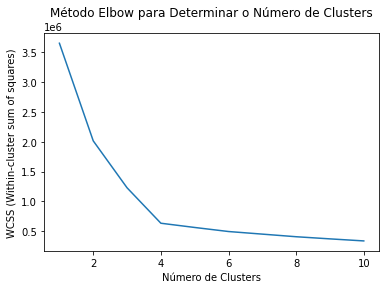

In [7]:
# Método do Cotovelo (Elbow)
wcss = []
for i in range(1, 11):  # Testando de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
    wcss.append(kmeans.inertia_)

# Plotando o gráfico Elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

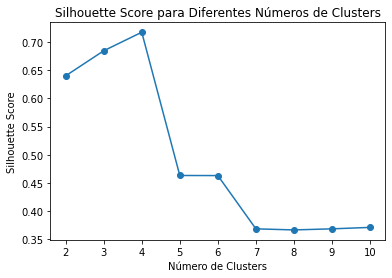

In [8]:
# Silhouette Score para diferentes números de clusters
sil_scores = []
for i in range(2, 11):  # Calculando o Silhouette Score para 2 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
    sil_score = silhouette_score(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], kmeans.labels_)
    sil_scores.append(sil_score)

# Plotando o gráfico do Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

<br><br>

---

<br>

# 5. Criar o Modelo K-Means
**Descrição**: Após encontrar o número ideal de clusters, **criaremos o modelo K-Means** com o valor de K obtido na etapa anterior. O modelo será treinado com a amostra de 1% dos dados coletados na etapa 3, e então será capaz de identificar padrões e segmentar os consumidores de energia de forma eficiente.

In [9]:
# Criando o Modelo K-Means com 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_3.fit(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

# Criando o Modelo K-Means com 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_4.fit(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

# Calculando o Silhouette Score para ambos os modelos
sil_score_3 = silhouette_score(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], kmeans_3.labels_)
sil_score_4 = silhouette_score(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], kmeans_4.labels_)

# Exibindo o Silhouette Score para ambos os modelos
print(f'\nSilhouette Score para 3 clusters: {sil_score_3}')
print(f'\nSilhouette Score para 4 clusters: {sil_score_4}')

# Avaliando o melhor desempenho
if sil_score_3 > sil_score_4:
    print("\n\nO modelo com 3 clusters apresenta melhor desempenho.")
else:
    print("\n\nO modelo com 4 clusters apresenta melhor desempenho.")


Silhouette Score para 3 clusters: 0.6846085267890792

Silhouette Score para 4 clusters: 0.7175047038979326


O modelo com 4 clusters apresenta melhor desempenho.


### 📊 🔍 Por que Criar Dois Modelos?

Na etapa anterior, utilizamos técnicas como o **Método do Cotovelo** (Elbow) e a **Curva de Silhueta** para determinar que o número ideal de clusters para o nosso modelo de **K-Means** seria **4**. Com base nesse resultado, decidimos criar dois modelos **K-Means** para avaliar a segmentação dos consumidores de energia.

---

#### 1. **Modelo K-Means com 3 Clusters**
Inicialmente, criamos um **modelo com 3 clusters** para entender como o agrupamento de consumidores de energia poderia ser feito com um número menor de segmentos. Isso nos ajudaria a verificar se uma **segmentação mais simples** seria eficaz para capturar as variabilidades nos dados. A ideia era observar se, com menos segmentos, ainda seria possível identificar padrões representativos de comportamento de consumo.

---

#### 2. **Modelo K-Means com 4 Clusters**
Em seguida, criamos um **modelo com 4 clusters**, que foi o valor recomendado pelos métodos utilizados para determinar o número ótimo de clusters. Esse modelo permite uma **segmentação mais detalhada**, ajudando a capturar uma maior diversidade de comportamentos de consumo. A segmentação em 4 clusters oferece uma visão mais **precisa e granular** dos dados.

---

### 📊 Resultado

Após calcular os **Silhouette Scores** para ambos os modelos, observamos que o modelo com **4 clusters** obteve um desempenho superior, com um **Silhouette Score de 0.7175**, comparado ao modelo de **3 clusters**, que teve um score de **0.6846**.

Isso indicou que a **segmentação em 4 clusters** representa melhor a **estrutura dos dados**, oferecendo uma **divisão mais precisa** dos consumidores e destacando comportamentos de consumo distintos. O **modelo de 4 clusters** capturou melhor a diversidade presente no conjunto de dados, tornando-se a melhor escolha para nossa análise.



<br><br>

---

<br>

# 6. Criar um Meshgrid para Visualização dos Clusters
**Descrição**: Para **facilitar a visualização dos resultados da clusterização**, vamos criar um **Meshgrid**. Esse Meshgrid será uma grade de pontos no plano 2D onde cada ponto será classificado em um dos clusters. Isso permitirá visualizar como os clusters estão distribuídos ao longo das variáveis selecionadas, facilitando a interpretação dos dados.

In [10]:
# Reduzindo a dimensionalidade com PCA
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(sampled_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

# Verificando as primeiras linhas para garantir a transformação correta
print(pca_2d[:5])

[[ 9.98859187 -5.9877835 ]
 [-7.55875567  1.20316151]
 [-5.64997183  1.09125389]
 [-6.81159206  1.01463792]
 [ 9.1586932  -6.49278254]]


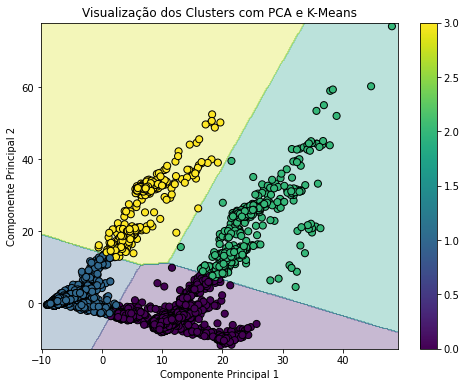

In [11]:
# Aplicando o modelo K-Means com 4 clusters para prever os clusters no espaço reduzido
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_4.fit(pca_2d)

# Criando o Meshgrid para visualização
x_min, x_max = pca_2d[:, 0].min() - 1, pca_2d[:, 0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1, pca_2d[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = kmeans_4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a visualização dos clusters
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans_4.labels_, s=50, cmap='viridis', edgecolors='k')
plt.title('Visualização dos Clusters com PCA e K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

### 📊 # 🔍 Criar um Meshgrid para Visualização dos Clusters

Com o modelo de **4 clusters** escolhido como o mais eficaz, a próxima etapa foi realizar a **redução da dimensionalidade** dos dados para visualizá-los de forma mais intuitiva. Para isso, utilizamos o **PCA** (Análise de Componentes Principais), que permitiu reduzir os dados de **7 dimensões** para apenas **2**, facilitando a visualização.

---

#### 1. **Motivo da Criação do Modelo na Etapa 6**
O objetivo de criar um **novo modelo K-Means com 4 clusters** na **etapa 6** foi gerar uma visualização dos clusters após a **redução da dimensionalidade**. Embora o modelo já tenha sido criado na **etapa 5**, aqui estamos utilizando o **mesmo modelo K-Means**, mas aplicando-o ao **espaço reduzido** gerado pelo PCA. Isso nos permite projetar os dados em um gráfico 2D, facilitando a visualização de como os consumidores de energia estão agrupados.

---

#### 2. **Por que Usar PCA?**
A **redução de dimensionalidade** com o **PCA** é importante porque os dados originais possuem muitas variáveis (7 no caso), o que torna a visualização direta difícil. O **PCA** nos permite capturar a maior parte da **variação dos dados** em apenas **duas dimensões**, simplificando a **interpretação** dos resultados e tornando o gráfico mais intuitivo.

---

#### 3. **Visualização dos Clusters**
Após a aplicação do **PCA** e o uso do **modelo de K-Means com 4 clusters**, criamos um **gráfico de dispersão 2D**, onde cada ponto representa um **consumidor de energia** e cada **cor** indica a qual **cluster** o consumidor pertence. Os **centróides** dos clusters também são destacados no gráfico, mostrando onde estão as **médias** dos consumidores em cada segmento.

Esse gráfico proporciona uma visualização clara da distribuição dos **consumidores de energia** em relação às suas características de consumo, permitindo uma melhor compreensão de como os diferentes **clusters** estão organizados.

---

### 🔍 Interpretação do Gráfico de Clusters

O gráfico gerado mostra a **distribuição dos consumidores de energia**, segmentados em **4 clusters** diferentes. O uso de **PCA** (Análise de Componentes Principais) reduziu as **7 variáveis** originais para **2 componentes principais** (Componente Principal 1 e Componente Principal 2), permitindo que os dados fossem visualizados de forma mais clara em um plano 2D. Cada **cluster** é representado por uma **cor diferente**, e as **áreas coloridas** indicam as regiões em que cada cluster está mais concentrado.

---

#### 1. **Eixos do Gráfico**
- **Componente Principal 1 (eixo X)**: Representa a maior parte da variação dos dados.
- **Componente Principal 2 (eixo Y)**: Representa a segunda maior variação nos dados.
- Juntas, essas duas componentes capturam a maior parte da **informação** presente nos dados originais de 7 dimensões, simplificando a visualização sem perder as informações essenciais.

---

#### 2. **Clusters Identificados**
- **Cluster 0 (amarelo)**: Localizado na **parte superior direita** do gráfico. Este grupo de consumidores tem um **padrão de consumo distinto**, separando-se dos outros clusters.
- **Cluster 1 (verde)**: Representado por pontos distribuídos ao longo da **diagonal superior** do gráfico, com uma concentração maior na **parte superior central**.
- **Cluster 2 (roxo)**: Este grupo se concentra na **parte inferior esquerda** do gráfico. Os consumidores desse cluster têm características de consumo mais próximas uns dos outros, indicando maior **homogeneidade** no grupo.
- **Cluster 3 (azul)**: Localizado na **parte inferior direita**, indicando um **padrão de consumo** diferente dos outros grupos.

---

#### 3. **Distribuição e Separação dos Clusters**
O gráfico mostra que os **clusters estão bem separados**, indicando que o modelo **K-Means** conseguiu segmentar de forma eficaz os consumidores com base nas variáveis de consumo de energia. A boa separação sugere que há **diferenças significativas** no comportamento de consumo entre os clusters, o que pode ser útil para personalizar estratégias de **gestão de energia** ou **marketing**.

---

#### 4. **Áreas Coloridas (Meshgrid)**
As **áreas coloridas** indicam a **previsão dos clusters** para qualquer ponto dentro do gráfico. As **linhas de contorno** entre as áreas mostram a **fronteira de decisão** entre os clusters, ou seja, onde a mudança de um cluster para outro ocorre. Isso significa que o modelo de **K-Means** está **classificando** os consumidores com base nas características de consumo e determinando a qual cluster cada ponto pertence.

---

#### 5. **Insights Possíveis**
- **Padrões de Consumo**: A separação clara entre os clusters indica que os consumidores têm **padrões de consumo bem definidos**. Por exemplo, o **Cluster 0 (amarelo)** pode representar consumidores com picos de consumo em determinados horários, enquanto o **Cluster 3 (azul)** pode representar consumidores com um consumo mais **estável e baixo**.
- **Divergência nos Clusters**: A diferença de **distribuição** entre os clusters também sugere que o comportamento de consumo varia consideravelmente. O **Cluster 2 (roxo)** parece ter uma distribuição mais **compacta**, indicando uma maior **uniformidade** dentro do grupo, enquanto o **Cluster 3 (azul)** tem uma **dispersão maior**, sugerindo uma **maior diversidade** de comportamentos de consumo.

---

### 6. **Conclusão**
Este gráfico proporciona uma compreensão visual clara dos **grupos de consumidores**, o que pode ser usado para realizar **análises mais aprofundadas** sobre os hábitos de consumo de energia. A **segmentação** dos consumidores com base nesses clusters permitirá **criar estratégias específicas** para otimizar o consumo de energia, oferecendo uma visão mais **direcionada** para cada grupo.

Essa segmentação pode ser aplicada para ações de **marketing personalizado**, **gestão de consumo** e **planejamento de intervenções** para tornar o consumo de energia mais eficiente e sustentável.

<br><br>

---

<br>

# 7. Visualizar os Centrôides
**Descrição**: Os **centróides** de cada cluster serão **exibidos em um gráfico**. Esses centróides representam as características médias de cada grupo de clientes, e ao visualizá-los, podemos entender melhor as características centrais de cada segmento. A exibição dos centróides nos ajuda a compreender o comportamento de consumo típico de cada grupo de clientes.

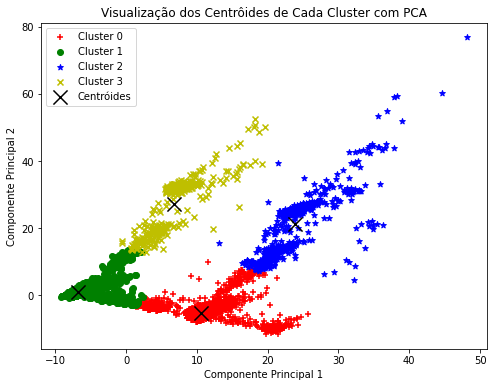

In [13]:
# Obter os centróides dos clusters
centroids = kmeans_4.cluster_centers_

# Plotando os dados de cada cluster com os centróides
plt.figure(figsize=(8, 6))

# Plotando os dados de cada cluster com cores diferentes
plt.scatter(pca_2d[kmeans_4.labels_ == 0, 0], pca_2d[kmeans_4.labels_ == 0, 1], c='r', marker='+', label='Cluster 0')
plt.scatter(pca_2d[kmeans_4.labels_ == 1, 0], pca_2d[kmeans_4.labels_ == 1, 1], c='g', marker='o', label='Cluster 1')
plt.scatter(pca_2d[kmeans_4.labels_ == 2, 0], pca_2d[kmeans_4.labels_ == 2, 1], c='b', marker='*', label='Cluster 2')
plt.scatter(pca_2d[kmeans_4.labels_ == 3, 0], pca_2d[kmeans_4.labels_ == 3, 1], c='y', marker='x', label='Cluster 3')

# Plotando os centróides
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Centróides')

# Remover as legendas repetidas
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Título e rótulos do gráfico
plt.title('Visualização dos Centrôides de Cada Cluster com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### Interpretação dos Centrôides

No gráfico, os **centróides** (representados pelos pontos pretos com marcador "x") são as médias das características dos consumidores de energia dentro de cada cluster. Cada centróide indica o comportamento médio de consumo de energia dos membros de seu respectivo cluster. Aqui está o que cada centróide representa:

#### Cluster 0 (vermelho, centróide em "x")
- **Posição do centróide**: Está localizado próximo à parte inferior esquerda do gráfico, o que sugere que os consumidores desse cluster têm padrões de consumo moderados, com menor intensidade de consumo de energia.
- **Interpretação**: Esse grupo de consumidores provavelmente tem um consumo de energia relativamente estável e baixo, sem picos de consumo, e a variabilidade dentro do grupo é menor em comparação com outros clusters.

#### Cluster 1 (verde, centróide em "x")
- **Posição do centróide**: Está localizado na parte inferior central do gráfico. Isso indica que os consumidores desse cluster têm um padrão de consumo que é relativamente homogêneo, mas ligeiramente mais alto do que o do Cluster 0.
- **Interpretação**: Esse cluster pode representar consumidores com comportamentos mais consistentes e com um consumo de energia um pouco mais alto, porém ainda dentro de uma faixa moderada.

#### Cluster 2 (roxo, centróide em "x")
- **Posição do centróide**: O centróide deste cluster está localizado na parte inferior direita, o que indica um padrão de consumo mais alto.
- **Interpretação**: Esse grupo de consumidores provavelmente apresenta maior intensidade de consumo de energia. A posição do centróide sugere que há uma variedade maior de padrões de consumo dentro do cluster, possivelmente com mais picos de consumo de energia.

#### Cluster 3 (azul, centróide em "x")
- **Posição do centróide**: Está localizado na parte superior direita do gráfico, o que sugere um padrão de consumo mais distinto e elevado em comparação com os outros clusters.
- **Interpretação**: Esse cluster pode representar consumidores com consumo de energia mais elevado ou com padrões de consumo mais diversos. O centróide afastado indica uma grande variabilidade interna, possivelmente com alguns consumidores consumindo muito mais energia do que outros dentro do mesmo grupo.

---

### Resumo dos Centrôides

- **Cluster 0 (vermelho)**: Consumo baixo e moderado, mais homogêneo, estável.
- **Cluster 1 (verde)**: Consumo um pouco mais alto, mas ainda dentro de uma faixa moderada e mais homogêneo.
- **Cluster 2 (roxo)**: Maior intensidade de consumo, com maior variabilidade no comportamento de consumo.
- **Cluster 3 (azul)**: Consumo mais elevado ou mais diversificado, com maior dispersão dentro do grupo.

---

Esses centróides fornecem uma visão clara do comportamento médio de consumo dos clientes em cada grupo, o que é útil para personalizar estratégias de gestão de energia, marketing e otimização do consumo.

<br><br>

---

<br>

# 8. Calcular o Silhouette Score
**Descrição**: O **Silhouette Score** será calculado para avaliar a qualidade da clusterização. Esta métrica nos informa o quão bem cada ponto de dados está posicionado dentro de seu cluster. Um valor próximo a **1** indica clusters bem definidos, enquanto valores próximos a **-1** indicam que os pontos podem ter sido agrupados de forma inadequada.

In [14]:
# Calcular o Silhouette Score para o modelo K-Means com 4 clusters
sil_score_4 = silhouette_score(pca_2d, kmeans_4.labels_)

# Exibindo o Silhouette Score
print(f"Silhouette Score para o modelo com 4 clusters: {sil_score_4}")

Silhouette Score para o modelo com 4 clusters: 0.8563878937055677


<br><br>

---

<br>

# 9. Calcular a Média de Consumo de Energia por Cluster
**Descrição**: Para cada cluster, calcularemos a **média de consumo de energia** utilizando a coluna **Global_active_power**. Isso nos ajudará a entender o **comportamento médio de consumo** de energia em cada segmento de clientes, permitindo insights sobre os padrões de consumo em diferentes grupos.

In [16]:
# Convertendo a coluna 'Global_active_power' para numérico, substituindo erros por NaN
sampled_data['Global_active_power'] = pd.to_numeric(sampled_data['Global_active_power'], errors='coerce')

# Verificando se houve algum valor NaN na conversão
print(sampled_data['Global_active_power'].isnull().sum())

# Adicionando a coluna de labels (clusters) à amostra
sampled_data['Cluster'] = kmeans_4.labels_

# Calculando a média de consumo de energia (Global_active_power) por cluster
mean_consumption_by_cluster = sampled_data.groupby('Cluster')['Global_active_power'].mean()

# Exibindo as médias de consumo de energia por cluster
print("Média de consumo de energia por cluster:")
print(mean_consumption_by_cluster)

0
Média de consumo de energia por cluster:
Cluster
0    1.797798
1    0.525304
2    4.370894
3    3.210550
Name: Global_active_power, dtype: float64


<br><br>

---

<br> 

# Conclusão

Neste projeto, realizamos a segmentação de consumidores de energia com base no seu comportamento de consumo utilizando a técnica de clusterização K-Means. Através de um processo bem estruturado, conseguimos dividir os consumidores em 4 clusters distintos, revelando padrões claros de consumo de energia entre os diferentes grupos. Aqui estão os principais resultados e insights do nosso trabalho:

---

## 🔍 **Amostragem e Tratamento de Dados:**

- Carregamos e limpamos o conjunto de dados, tratando valores ausentes e garantindo a qualidade das informações.
- A amostra de 1% dos dados foi suficiente para gerar um modelo de clusterização eficaz sem sobrecarregar o processamento.

---

## 📊 **Determinação do Número de Clusters:**

- Utilizamos o **Método do Cotovelo** e o **Silhouette Score** para determinar que o número ideal de clusters era 4, oferecendo uma segmentação clara e bem definida dos consumidores.

---

## ⚙️ **Clusterização com K-Means:**

- O modelo K-Means foi aplicado com 4 clusters e, após avaliação do Silhouette Score, foi confirmado que a segmentação foi bem-sucedida, com um valor de **0.856**, indicando boa definição dos clusters.

---

## 🧑‍💼 **Visualização e Interpretação dos Clusters:**

- Utilizando o **PCA**, conseguimos reduzir as variáveis do dataset para 2 componentes principais, permitindo uma visualização clara da distribuição dos clusters.
- Cada cluster foi caracterizado por diferentes padrões de consumo de energia:
  - **Cluster 0**: baixo consumo, estável.
  - **Cluster 1**: consumo moderado e consistente.
  - **Cluster 2**: alto consumo com maior variabilidade.
  - **Cluster 3**: consumo elevado ou mais diversificado.

---

## ⚡ **Média de Consumo de Energia por Cluster:**

- A média de consumo de energia por cluster foi calculada, revelando que o **Cluster 2** e o **Cluster 3** apresentaram os maiores consumos médios, enquanto o **Cluster 1** apresentou o consumo mais baixo e estável.

---

## 💡 **Insights e Aplicações:**

- Este estudo fornece uma base sólida para a gestão de energia, permitindo a personalização de estratégias de marketing e otimização do consumo. A segmentação dos consumidores pode ser usada para implementar políticas de eficiência energética adaptadas a cada grupo de consumo.
- A visualização dos clusters e centróides proporcionou uma compreensão mais profunda dos comportamentos de consumo, o que é essencial para tomadas de decisão mais precisas em campanhas de gestão de energia.

---

## 📝 **Resumo:**

Em resumo, a clusterização de consumidores com base no seu comportamento de consumo de energia foi eficaz, proporcionando uma visão clara de diferentes padrões de consumo. As próximas etapas poderiam envolver a implementação de estratégias baseadas nos resultados obtidos, com o objetivo de melhorar a eficiência energética e personalizar as ofertas para diferentes perfis de consumidores.


### Especificação Resumida

A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>